<h1 style="direction:rtl;text-align:center;color:#ffffff;background-color:#cca3db;font-size:48p"><strong>سوال پنجم</strong> </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> a) </strong></h3>

In [2]:
missing_values = ["NA","?"]
df = pd.read_csv('thyroid.csv',na_values=missing_values)
df.head()

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107.0,10.1,2.2,0.9,2.7,1.0
1,NaN,9.9,3.1,2.0,5.9,1.0
2,127.0,12.9,2.4,NaN,0.6,1.0
3,109.0,NaN,1.6,1.4,1.5,1.0
4,105.0,7.3,1.5,NaN,-0.1,1.0


In [3]:
df = pd.DataFrame(df[pd.notnull(df['Outcome'])])
df.head()

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107.0,10.1,2.2,0.9,2.7,1.0
1,NaN,9.9,3.1,2.0,5.9,1.0
2,127.0,12.9,2.4,NaN,0.6,1.0
3,109.0,NaN,1.6,1.4,1.5,1.0
4,105.0,7.3,1.5,NaN,-0.1,1.0


In [4]:
df.replace(np.NaN,df.mean(),inplace=True)
df.head()

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107.000000,10.100000,2.2,0.90000,2.7,1.0
1,108.233129,9.900000,3.1,2.00000,5.9,1.0
2,127.000000,12.900000,2.4,1.28875,0.6,1.0
3,109.000000,10.814024,1.6,1.40000,1.5,1.0
4,105.000000,7.300000,1.5,1.28875,-0.1,1.0


<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<p style="direction:rtl;text-align:right;">ابتدا سایر علائمی که علاوه بر مقادیر استاندارد بجای null استفاده شده اند را تاثیر دادیم و فایل را خواندیم. سپس رکورد هایی را که متغیر تارگت آنها یعنی Outcome  نال بود حذف کردیم و سپس در سایر ستون ها بجای مقادیر null میانگین آن ستون را قرار دادیم</p>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> b) </strong></h3>

In [5]:
import seaborn as sns

In [6]:
corrMatrix = df.corr()
corrMatrix

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
T3_resin,1.000000,-0.225165,-0.028187,0.049092,0.188859,-0.261762
Serum_thyroxin,-0.225165,1.000000,0.688075,-0.178576,-0.400342,0.785882
Serum_triiodothyronine,-0.028187,0.688075,1.000000,-0.136191,-0.274896,0.681741
Basal_TSH,0.049092,-0.178576,-0.136191,1.000000,0.179947,-0.219198
Abs_diff_TSH,0.188859,-0.400342,-0.274896,0.179947,1.000000,-0.437559
Outcome,-0.261762,0.785882,0.681741,-0.219198,-0.437559,1.000000


<AxesSubplot:>

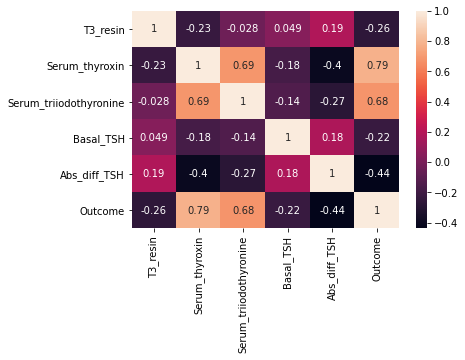

In [7]:
sns.heatmap(corrMatrix, annot=True)

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<p style="direction:rtl;text-align:right;">ایتدا ماتریس ضزایب همبستگی را ایجاد کرده و سپس heatmap آن را رسم کردیم. هرچه اعداد به +-1 نزدیک تر باشند همبستگی بیشتر است</p>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> c) </strong></h3>

In [8]:
c = df.groupby('Outcome')['Outcome'].count()
c

Outcome
1.0    144
2.0     30
Name: Outcome, dtype: int64

In [9]:
print("Current Percentage of two/total:",(30/174)*100)
print("#Records Needed to Resample To Achieve 50% two/total: " , ((0.5*174)-30)/0.5) #x = (p(rare)-current)/1-p

Current Percentage of two/total: 17.24137931034483
#Records Needed to Resample To Achieve 50% two/total:  114.0


In [10]:
to_resample = df.loc[df['Outcome'] == 2]
our_resample = to_resample.sample(n = 114, replace = True)
balanced_df = pd.concat([df, our_resample])
print(balanced_df.groupby('Outcome')['Outcome'].count())
print("Current Percentage of 2:",(144/(144+144))*100)

Outcome
1.0    144
2.0    144
Name: Outcome, dtype: int64
Current Percentage of 2: 50.0


<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<p style="direction:rtl;text-align:right;">در بخش اول دیدیم نسبت رکوردها با کلاس هدف 2 نسبت به کلاس 1به نسبت کمتر است و داده ها  می توانند imbalanced تلقی شوند و در کل کلاس 2،  17 درصد کل را تشکیل داده است.
برای رساندن این درصد به 50% به 114 رکورد نیاز داریم. در بخش بعد داده های با کلاس 2 را که می خواهیم سمپل کنیم در to_resample ذخیره می کنیم . 114 تای دیگر مشابه آنها تواید و با دیتاست اصلی concat می کنیم. حال درصد هریک از کلاس ها به 50 رسیده است</p>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> d) </strong></h3>

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = balanced_df.drop('Outcome', axis=1)
y = balanced_df['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<p style="direction:rtl;text-align:right;">ابتدا X وy را جدا کرده و سپس X و y های آموزش و تست را با اندازه تست 0.2 می سازیم.</p>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> e) </strong></h3>

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Index(['T3_resin', 'Serum_thyroxin', 'Serum_triiodothyronine', 'Basal_TSH',
       'Abs_diff_TSH'],
      dtype='object')


[Text(223.20000000000002, 597.96, 'X[1] <= 11.0\ngini = 0.5\nsamples = 230\nvalue = [114, 116]'),
 Text(111.60000000000001, 489.24, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(334.8, 489.24, 'X[2] <= 1.55\ngini = 0.233\nsamples = 134\nvalue = [18, 116]'),
 Text(223.20000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(446.40000000000003, 380.52000000000004, 'X[4] <= 2.204\ngini = 0.146\nsamples = 126\nvalue = [10, 116]'),
 Text(334.8, 271.8, 'X[3] <= 1.9\ngini = 0.079\nsamples = 121\nvalue = [5, 116]'),
 Text(223.20000000000002, 163.07999999999998, 'X[1] <= 12.95\ngini = 0.064\nsamples = 120\nvalue = [4, 116]'),
 Text(111.60000000000001, 54.360000000000014, 'gini = 0.278\nsamples = 24\nvalue = [4, 20]'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 96\nvalue = [0, 96]'),
 Text(446.40000000000003, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(558.0, 271.8, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

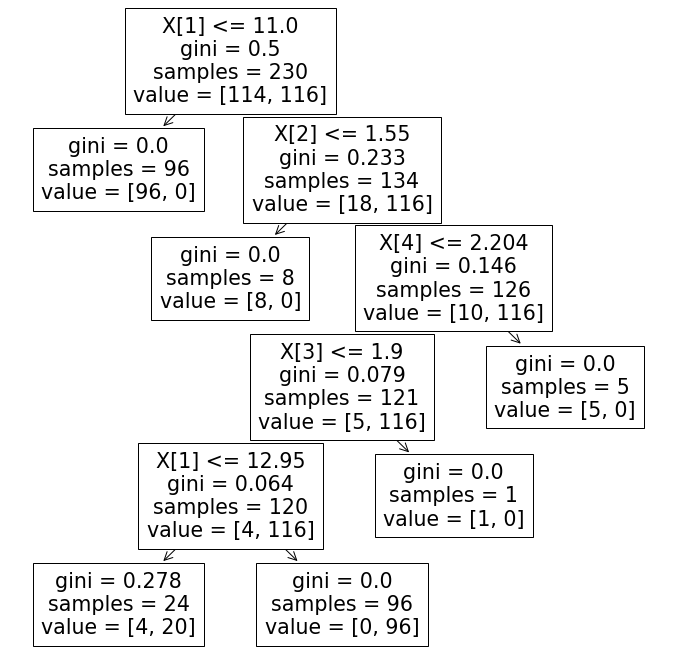

In [51]:
cart00 = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=6).fit(X_train,y_train)
print(X_train.columns)
fig, axes = plt.subplots(1,1,figsize=(12,12))
tree.plot_tree(cart00,ax=axes)

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<p style="direction:rtl;text-align:right;">به کمک کتابخانه sklearn یک DecisionTreeClassifier با پارامتر gini ساختیم و با داده های x و y آموزشی آن را train کردیم و درخت ان را پلات کردیم.</p>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> f) </strong></h3>

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
 y_predicted = cart00.predict(X_test)

In [18]:
# cart01.score(y_predicted,y_test)

print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted))

[+] confusion matrix

[[29  1]
 [ 0 28]]

[+] classification report

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98        30
         2.0       0.97      1.00      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<p style="direction:rtl;text-align:right;">X_test را به مدلcart00 که آموزش دادیم دادیم تا y آن را پیشبینی کند و آنها را در y_predicted ذخیره کردیم.
برای سنجش دقت confusion matrix را نمایش دادیم که بیانگر این است که در کل روی 58 داده تست شده است مدل و 1 نمونه به خطا ب بقیه صحیح پیش بینی شده اند و به دقت 98% رسیده ایم.</p>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> g) </strong></h3>

In [19]:
#max_depth = 1

cart01 = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=6,max_depth=1).fit(X_train,y_train)
y_predicted01 = cart01.predict(X_test)
    
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted01))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted01))

[+] confusion matrix

[[25  5]
 [ 0 28]]

[+] classification report

              precision    recall  f1-score   support

         1.0       1.00      0.83      0.91        30
         2.0       0.85      1.00      0.92        28

    accuracy                           0.91        58
   macro avg       0.92      0.92      0.91        58
weighted avg       0.93      0.91      0.91        58



In [20]:
#max_depth = 2

cart02 = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=6,max_depth=2).fit(X_train,y_train)
y_predicted02 = cart02.predict(X_test)
    
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted02))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted02))

[+] confusion matrix

[[26  4]
 [ 0 28]]

[+] classification report

              precision    recall  f1-score   support

         1.0       1.00      0.87      0.93        30
         2.0       0.88      1.00      0.93        28

    accuracy                           0.93        58
   macro avg       0.94      0.93      0.93        58
weighted avg       0.94      0.93      0.93        58



In [21]:
#max_depth = 3

cart03 = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=6,max_depth=3).fit(X_train,y_train)
y_predicted03 = cart03.predict(X_test)
    
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted03))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted03))

[+] confusion matrix

[[28  2]
 [ 0 28]]

[+] classification report

              precision    recall  f1-score   support

         1.0       1.00      0.93      0.97        30
         2.0       0.93      1.00      0.97        28

    accuracy                           0.97        58
   macro avg       0.97      0.97      0.97        58
weighted avg       0.97      0.97      0.97        58



In [22]:
#max_depth = 4

cart04 = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=6,max_depth=4).fit(X_train,y_train)
y_predicted04 = cart04.predict(X_test)
    
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted04))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted04))

[+] confusion matrix

[[29  1]
 [ 0 28]]

[+] classification report

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98        30
         2.0       0.97      1.00      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [23]:
#max_depth = 5

cart05 = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=6,max_depth=5).fit(X_train,y_train)
y_predicted05 = cart05.predict(X_test)
    
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted05))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted05))

[+] confusion matrix

[[29  1]
 [ 0 28]]

[+] classification report

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98        30
         2.0       0.97      1.00      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [24]:
#max_depth = 6

cart06 = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=6,max_depth=6).fit(X_train,y_train)
y_predicted06 = cart06.predict(X_test)
    
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted06))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted06))

[+] confusion matrix

[[29  1]
 [ 0 28]]

[+] classification report

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98        30
         2.0       0.97      1.00      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [25]:
#max_depth = 7

cart07 = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=6,max_depth=7).fit(X_train,y_train)
y_predicted07 = cart07.predict(X_test)
    
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted07))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted07))

[+] confusion matrix

[[29  1]
 [ 0 28]]

[+] classification report

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98        30
         2.0       0.97      1.00      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [26]:
#max_depth = 8

cart08 = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=6,max_depth=8).fit(X_train,y_train)
y_predicted08 = cart08.predict(X_test)
    
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted08))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted08))

[+] confusion matrix

[[29  1]
 [ 0 28]]

[+] classification report

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98        30
         2.0       0.97      1.00      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [27]:
#max_depth = 9

cart09 = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=6,max_depth=9).fit(X_train,y_train)
y_predicted09 = cart09.predict(X_test)
    
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted09))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted09))

[+] confusion matrix

[[29  1]
 [ 0 28]]

[+] classification report

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98        30
         2.0       0.97      1.00      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



<h4 style="direction:rtl;text-align:right;font-family:Yekan, sans-serif;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>

<h4 style="direction:rtl">برای بیش از 4 به 98% دقت رسیده و در هر مورد 1 خطا داشته ایم. </h4>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> h) </strong></h3>

Feature 0 (T3_resin) :  Score: 0.00000
Feature 1 (Serum_thyroxin) :  Score: 0.78370
Feature 2 (Serum_triiodothyronine) :  Score: 0.11772
Feature 3 (Basal_TSH) :  Score: 0.01711
Feature 4 (Abs_diff_TSH) :  Score: 0.08148


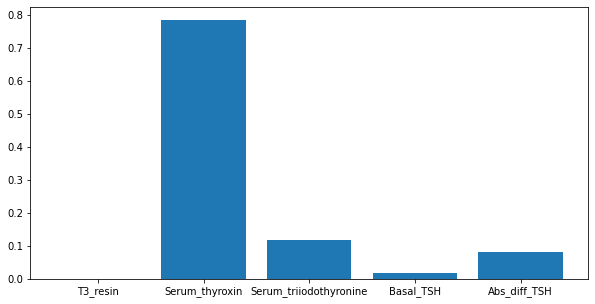

In [44]:
importance = cart00.feature_importances_
for i,v in enumerate(importance):
    print('Feature %0d (%s) :  Score: %.5f' % (i,X_train.columns[i],v))
    
fig, axes = plt.subplots(1,1,figsize=(10,5))
plt.bar([x for x in X_train.columns], importance)
plt.show()

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>
<p style="direction:rtl;text-align:right;">Feature Importance به روش هایی گفته می شود که بر حسب اینکه یک متغیر یا فیچر چقدر در پیش بینی متغیر هدف مهم و اثرگدار است به آن یک ارزش داده می شود.</p>
<p style="direction:rtl;text-align:right;">در مدل های پیشگو اهمیت بالایی دارد و علاوه بر اینکه در مورد دیتا و مدل به ما دید می دهد مبنای کاهش ابعاد و انتخاب فیچر هم هست. به ما نشان می دهد که کدام فیچر ها به فیچر هدف مرتبط تر هستند و کدام دورتر. در این کار را متخصص بیزینس هم می تواند کمک کند تا بتوانیم داده های مناسب تری هم جمع آوری کنیم. همچنین چون عمدتا این مقدار پس از fit شدن مدل روی داده ها محاسبه می شود دردگاه خوبی هم در مورد مدل ما و فیچرهای مهم برای آن ارائه می دهد.به این صورت ما می توانیم فیچرهایی را که برای مدل ما مهم تر هستند نگه داریم و از بقیه صرف نظر کنیم. </p>
<p style="direction:rtl;text-align:right;">هرچه feature_importances_ بالاتر باشد ، ویژگی مهمتر است.به عنوان اهمیت جینی نیز شناخته می شود</p>
<p style="direction:rtl;text-align:right;">همانطور که از اعداد و نمودار فوق مشخص است serum_thyroxin مهم ترین فیچر برای پیش بینی Outcome است و سایر فیچر ها هم به ترتیب مشخض شده اند.</p>


<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> i) </strong></h3>

In [29]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

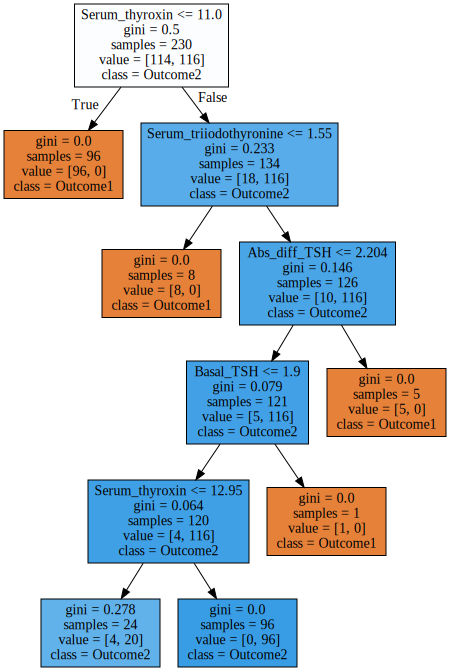

In [52]:
export_graphviz(cart09, out_file="tree.dot", class_names=["Outcome1", "Outcome2"],feature_names=X_train.columns, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>
<p style="direction:rtl;text-align:right;">درخت با max_depth=9 به 98درصد دقت می رسد پس آن برای رسم انتخاب شده است.درخت مربوط به آن را در فایلtree.dot با کلاس های متغیر هدف Outcome1و Outcome2 و اسامی فیچرهای معادل نام ستون هایX_train ذخیره کردایم. سپی فایل را خوانده و به کمک همان graphviz درخت را نمایش دادیم. در ادامه نیز به روش دیگری آن را نمایش خواهیم داد.
impurity=True باعث نمایش gini در نمودار می شود.</p>

<h3 style="text-align:left;color:#945aaf;background-color:#ffffff;font-size:48p"><strong> j) </strong></h3>

In [31]:
import collections
from IPython.display import Image  


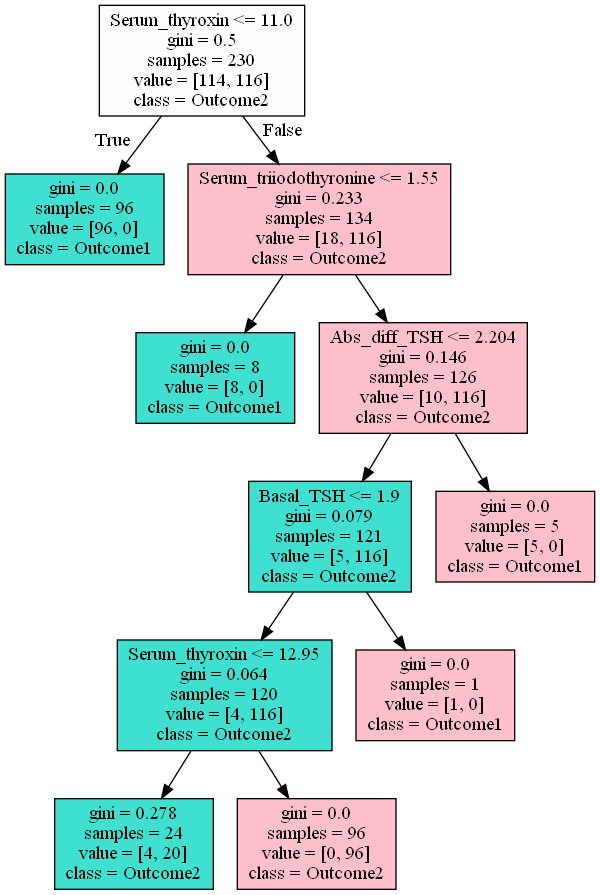

In [53]:
graph = pydotplus.graph_from_dot_data(dot_graph)
colors = ('turquoise', 'pink')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('mytree.png')
Image(graph.create_png())


<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:48p"><strong>شرح کد :</strong> </h4>
<p style="direction:rtl;text-align:right;">ابتدا dot_graph ی را که در سوال قبل از فایلtree.dot خواندیم به شکل یک گراف در متغیرgraph ذخیره می کنیم.
سپس پالت رنگی برای رسم را تعیین می کنیم.برای یال هایی که در گرافgraph وجود دارد مبدا و مقصد آنها را یه هم وصل می کنیم و سپس گراف را مرتب و رنگ آمیزی می کنیم.درنهایت آن را به عنوان یک عکس ذخیره و با خواندن غکس نمایش می دهیم.</p>
<h4 style="direction:rtl;text-align:right;color:#945aaf;background-color:#ffffff;font-size:40p"><strong>توصیف نمودار :</strong> </h4>
<p style="direction:rtl;text-align:right;">
اولین متغیری که بررسی شده است و در ریشه درخت قرار گرفته است Serum_thyroxin است چون separator خوبی است و تمایز بیشتری ایجاد می کند.اگر مقدار آن کمتر از 11 ابشد بدون بررسی هیچ ویژگی دیگر با می توان گفت در کلاس Outcome1 است و با توجه به  نمودار چون gini=0 کلاس خیلی خالص و ایده ال است.
سپس در سمت راست درخت با فرض متغیر قبل بزرگتر از 11 است متغیر بعدی را بررسی می کند که اگر کوچکترمساوی 1.55 باشد باز یک گره خالص از کلاس 1 را در خروجی خواهیم داشت اما اگر اینطور نباشد سراغ بررسی متغیرهای بعد می رویم و همینطور ادامه می دهیم تا درختی ساخته بشود که ترجیحا بالانس است و در برگ ها دسته بندی هایی صورت گرفته است که gini آنها حداقل است و دسته بندی مناسبی است. </p>